# Daily Forecast Example

Daily forecast is one of most popular use cases in time-series modeling. In this example, it aims to introduce a way to perform a daily forecast by modeling yearly and weekly seasonality together. We will use the aggregated number of sales from the [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).

In [1]:
import pandas as pd
import numpy as np

from orbit.models.dlt import DLTFull
from orbit.diagnostics.plot import plot_predicted_data
from orbit.utils.dataset import load_m5daily

For demo purpose, we just use a subset of regressors and perform log transformation on response to construct a multiplicative model.

In [2]:
df = load_m5daily()

# get a subset of regressor for demo purpose
regressor_col = ["Christmas","Halloween","LaborDay","Thanksgiving","Mother's day","PresidentsDay","NewYear"]

df = df[["date", "sales"] + regressor_col]

df['sales'] = np.log(df['sales'])

df.head()

,date,sales,Christmas,Halloween,LaborDay,Thanksgiving,Mother's day,PresidentsDay,NewYear
0,2011-01-29,10.393018,0,0,0,0,0,0,0
1,2011-01-30,10.365617,0,0,0,0,0,0,0
2,2011-01-31,10.076726,0,0,0,0,0,0,0
3,2011-02-01,10.142977,0,0,0,0,0,0,0
4,2011-02-02,9.859849,0,0,0,0,0,0,0


In [3]:
test_size = 28

train_df = df[:-test_size]
test_df = df[-test_size:]

Note that `level_sm_input` are used to fix level smoothing parameter. This is recommended in daily or higher frequency data.

In [4]:
dlt = DLTFull(response_col='sales',
              date_col='date',
              seasonality=7,
              seed=2020,
              regressor_col=regressor_col,
              level_sm_input=0.3, # recommend for higher frequency data
              regressor_sigma_prior=[0.5] * len(regressor_col),
              regression_penalty='lasso',
              period=365)

In [5]:
dlt.fit(train_df);

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [6]:
predicted_df = dlt.predict(test_df)

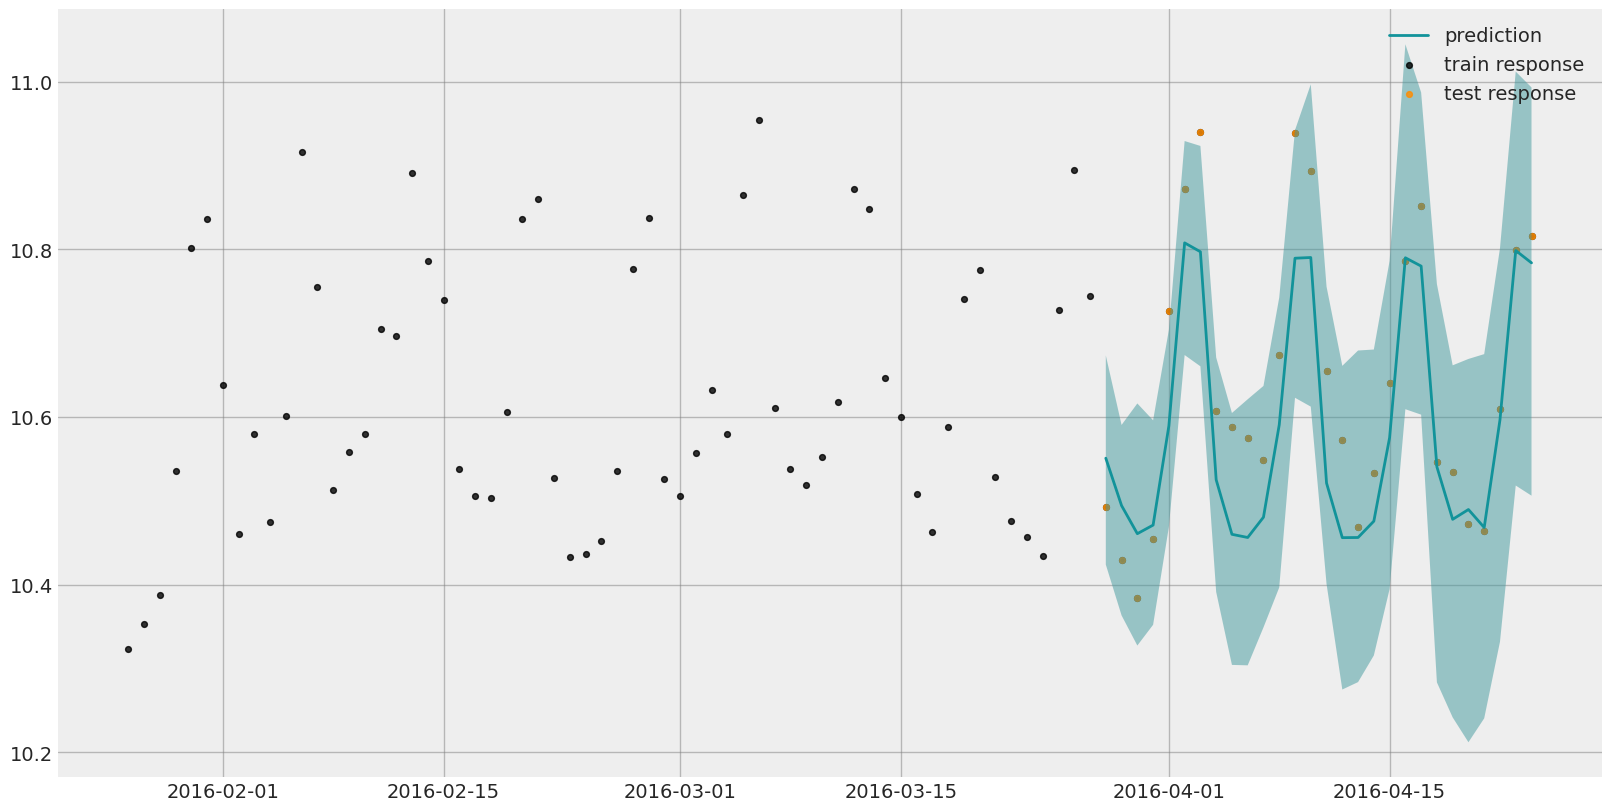

In [7]:
_ = plot_predicted_data(training_actual_df=df[-90:],
                        predicted_df=predicted_df[-90:],
                        test_actual_df=test_df,
                        date_col='date',
                        actual_col='sales')